In [ ]:
# Project Code for Opioid Epidemic Project

In [1]:
%matplotlib inline # command for plotting graphs

opName=list()

import csv
with open('opioids.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        opName.append(row[0])

#creating a list and adding durg names from the fie opioids.csv

opName.pop(0)

#Removing the first element i.e. a lablel

opName

#display the list

['ABSTRAL',
 'ACETAMINOPHEN-CODEINE',
 'ACTIQ',
 'ASCOMP WITH CODEINE',
 'ASPIRIN-CAFFEINE-DIHYDROCODEIN',
 'AVINZA',
 'BELLADONNA-OPIUM',
 'BUPRENORPHINE HCL',
 'BUTALB-ACETAMINOPH-CAFF-CODEIN',
 'BUTALB-CAFF-ACETAMINOPH-CODEIN',
 'BUTALBITAL COMPOUND-CODEINE',
 'BUTORPHANOL TARTRATE',
 'BUTRANS',
 'CAPITAL W-CODEINE',
 'CARISOPRODOL COMPOUND-CODEINE',
 'CARISOPRODOL-ASPIRIN-CODEINE',
 'CODEINE SULFATE',
 'CO-GESIC',
 'CONZIP',
 'DEMEROL',
 'DEMEROL',
 'DILAUDID',
 'DILAUDID',
 'DILAUDID-HP',
 'DISKETS',
 'DOLOPHINE HCL',
 'DURAGESIC',
 'DURAMORPH',
 'ENDOCET',
 'ENDODAN',
 'EXALGO',
 'FENTANYL',
 'FENTANYL CITRATE',
 'FENTORA',
 'FIORICET WITH CODEINE',
 'FIORINAL WITH CODEINE #3',
 'HYCET',
 'HYDROCODONE-ACETAMINOPHEN',
 'HYDROCODONE-IBUPROFEN',
 'HYDROMORPHONE ER',
 'HYDROMORPHONE HCL',
 'HYDROMORPHONE HCL',
 'IBUDONE',
 'INFUMORPH',
 'KADIAN',
 'LAZANDA',
 'LEVORPHANOL TARTRATE',
 'LORCET',
 'LORCET 10-650',
 'LORCET HD',
 'LORCET PLUS',
 'LORTAB',
 'MAGNACET',
 'MEPERIDINE HCL',


In [2]:
Opioids=list()

#creating a new list

import re
for i in opName:
    j=re.split(' ',i)[0]
    Opioids.append(j.split('-')[0])
    
#Selecting the first element from every drug in the opName list

print(Opioids)

#Display the list

['ABSTRAL', 'ACETAMINOPHEN', 'ACTIQ', 'ASCOMP', 'ASPIRIN', 'AVINZA', 'BELLADONNA', 'BUPRENORPHINE', 'BUTALB', 'BUTALB', 'BUTALBITAL', 'BUTORPHANOL', 'BUTRANS', 'CAPITAL', 'CARISOPRODOL', 'CARISOPRODOL', 'CODEINE', 'CO', 'CONZIP', 'DEMEROL', 'DEMEROL', 'DILAUDID', 'DILAUDID', 'DILAUDID', 'DISKETS', 'DOLOPHINE', 'DURAGESIC', 'DURAMORPH', 'ENDOCET', 'ENDODAN', 'EXALGO', 'FENTANYL', 'FENTANYL', 'FENTORA', 'FIORICET', 'FIORINAL', 'HYCET', 'HYDROCODONE', 'HYDROCODONE', 'HYDROMORPHONE', 'HYDROMORPHONE', 'HYDROMORPHONE', 'IBUDONE', 'INFUMORPH', 'KADIAN', 'LAZANDA', 'LEVORPHANOL', 'LORCET', 'LORCET', 'LORCET', 'LORCET', 'LORTAB', 'MAGNACET', 'MEPERIDINE', 'MEPERIDINE', 'MEPERITAB', 'METHADONE', 'METHADONE', 'METHADOSE', 'MORPHINE', 'MORPHINE', 'MORPHINE', 'MS', 'NALBUPHINE', 'NORCO', 'NUCYNTA', 'NUCYNTA', 'OPANA', 'OPANA', 'OPIUM', 'OXECTA', 'OXYCODONE', 'OXYCODONE', 'OXYCODONE', 'OXYCODONE', 'OXYCODONE', 'OXYCONTIN', 'OXYMORPHONE', 'OXYMORPHONE', 'PENTAZOCINE', 'PENTAZOCINE', 'PERCOCET', 'PERC

In [3]:
import pandas as pd
Prescription=pd.read_csv('prescriber-info.csv',index_col=0, parse_dates=True)

#Reading the csv file that contains the prescriber's info

In [4]:
s='.'
NewColumn=list()
for i in Prescription.columns:
    NewColumn.append(i.split(s,1)[0])

# Rename the columns by eliminating periods from the original column names

Prescription.columns=NewColumn

#displaying the column names

In [5]:
print (Prescription.columns)

Index(['Gender', 'State', 'Credentials', 'Specialty', 'ABILIFY',
       'ACETAMINOPHEN', 'ACYCLOVIR', 'ADVAIR', 'AGGRENOX', 'ALENDRONATE',
       ...
       'VERAPAMIL', 'VESICARE', 'VOLTAREN', 'VYTORIN', 'WARFARIN', 'XARELTO',
       'ZETIA', 'ZIPRASIDONE', 'ZOLPIDEM', 'Opioid'],
      dtype='object', length=255)


In [6]:
RemoveCol=list()

#Creating a list

for Pcol in Prescription.columns[4:254]:
    if Pcol not in Opioids:
        RemoveCol.append(Pcol)

# Adding the drug names in the list which are not opioid drugs

len(RemoveCol)

#Displaying the number of drigs that are not an opioid drug

238

In [25]:
Prescription_opioid=Prescription.drop(RemoveCol, axis=1)

#Removing the column of drug names that are not opioids

Prescription_opioid = Prescription_opioid[Prescription_opioid.Opioid == 1]

#Selecting a subset that has entries for which the prsecriber prescribed opioids

Prescription_opioid.head(n=10)

#Displaying the subset

,Gender,State,Credentials,Specialty,ACETAMINOPHEN,CARISOPRODOL,FENTANYL,HYDROCODONE,HYDROMORPHONE,METHADONE,MORPHINE,MORPHINE,OXYCODONE,OXYCODONE,OXYCONTIN,TRAMADOL,Opioid,Total_Opioids
NPI,,,,,,,,,,,,,,,,,,
1710982582,M,TX,DDS,Dentist,0,0,0,17,0,0,0,0,0,0,0,0,1,NaN
1245278100,F,AL,MD,General Surgery,0,45,0,182,0,0,0,24,33,87,0,36,1,NaN
1669567541,M,AZ,MD,Internal Medicine,43,0,0,0,0,0,22,146,229,29,0,90,1,NaN
1679650949,M,NV,MD,Hematology/Oncology,0,0,22,22,0,0,0,0,0,22,0,0,1,NaN
1548580897,M,PA,DO,General Surgery,0,0,0,0,0,0,0,0,25,0,0,0,1,NaN
1437192002,M,NH,MD,Family Practice,0,0,0,24,0,0,0,0,30,21,0,15,1,NaN
1821106832,F,WI,MD,Internal Medicine,0,0,25,0,0,0,0,0,0,11,0,28,1,NaN
1609931914,F,PR,MD,General Practice,0,0,0,0,0,0,0,0,0,0,0,71,1,NaN
1659334472,M,TX,MD,General Surgery,0,0,0,17,0,0,0,0,0,0,0,0,1,NaN


In [27]:
Prescription_notopioid = Prescription[Prescription.Opioid == 0]

#Selecting a subset that has entries for which the prsecriber did not prescribed opioids

Prescription_notopioid.head(n=10)

# Displaying the subset

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN,ACYCLOVIR,ADVAIR,AGGRENOX,ALENDRONATE,...,VESICARE,VOLTAREN,VYTORIN,WARFARIN,XARELTO,ZETIA,ZIPRASIDONE,ZOLPIDEM,Opioid,Total_Opioids
NPI,,,,,,,,,,,,,,,,,,,,,
1427182161,F,NY,MD,General Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,0,NaN
1407113988,F,PA,RNMSNANPBC,Nurse Practitioner,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1023260569,M,TX,OD,Optometry,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1548275050,M,OH,MD,Cardiology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1356388011,F,MA,MD,Internal Medicine,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,NaN
1588788921,M,CT,NaN,Hematology/Oncology,0,0,35,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1609121748,F,IA,ACNP,Nurse Practitioner,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1487630919,M,CT,PAC,Physician Assistant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1194795351,F,FL,ARNP,Nurse Practitioner,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [28]:
len(Prescription_opioid)

#The number of entries pertaining to the prescriber prescribing opioids


14688

In [29]:
len(Prescription_notopioid)

#The number of entries pertaining to the prescriber not prescribing opioids

10312

In [30]:
Prescription= Prescription_opioid

#Make a copy of the Prescription_opioid dataframe

In [31]:
Prescription['Credentials'] = Prescription['Credentials'].str.replace('[^\w\s]','')
Prescription['Credentials']=Prescription['Credentials'].str.replace(' ','')
Prescription['Credentials']

#Cleaning the Speciality column in the dataframe by removing the punctuations

NPI
1710982582             DDS
1245278100              MD
1669567541              MD
1679650949              MD
1548580897              DO
1437192002              MD
1821106832              MD
1609931914              MD
1659334472              MD
1144205303              MD
1952598419              MD
1780661793              MD
1548238389              MD
1366582587             DDS
1083907059              MD
1598748931              MD
1063566727             DPM
1629394754              MD
1174555080              MD
1871548537              MD
1841349677       MSNAPRNBC
1629038443              MD
1386607315              DO
1295852101              MD
1467448381             PAC
1285675637              MD
1679630891    DNPAPRNBCFNP
1346496197              MD
1922136613             DDS
1235426800            CRNP
                  ...     
1669782355             DMD
1689618753              MD
1376836916             DPM
1407898505              MD
1679914113            APRN
1871541482              

In [32]:
Prescription
df=Prescription

#Make a copy of the Prescription dataframe

In [33]:
df['Total_Opioids']=pd.DataFrame({'Total_Opioids': [] })

#Adding a new column

In [36]:
b=list()
for i in range(0, len(df)):
    a=list(df.iloc[i,4:16])
    df.iloc[i,17]=sum(a)

#Adding number of opioids prescribed by the prescriber for any opioid drugs and assigning it to the new variable 'Total opioids'

In [40]:
df #Displaying the dataframe

,Gender,State,Credentials,Specialty,ACETAMINOPHEN,CARISOPRODOL,FENTANYL,HYDROCODONE,HYDROMORPHONE,METHADONE,MORPHINE,MORPHINE,OXYCODONE,OXYCODONE,OXYCONTIN,TRAMADOL,Opioid,Total_Opioids
NPI,,,,,,,,,,,,,,,,,,
1710982582,M,TX,DDS,Dentist,0,0,0,17,0,0,0,0,0,0,0,0,1,17.0
1245278100,F,AL,MD,General Surgery,0,45,0,182,0,0,0,24,33,87,0,36,1,407.0
1669567541,M,AZ,MD,Internal Medicine,43,0,0,0,0,0,22,146,229,29,0,90,1,559.0
1679650949,M,NV,MD,Hematology/Oncology,0,0,22,22,0,0,0,0,0,22,0,0,1,66.0
1548580897,M,PA,DO,General Surgery,0,0,0,0,0,0,0,0,25,0,0,0,1,25.0
1437192002,M,NH,MD,Family Practice,0,0,0,24,0,0,0,0,30,21,0,15,1,90.0
1821106832,F,WI,MD,Internal Medicine,0,0,25,0,0,0,0,0,0,11,0,28,1,64.0
1609931914,F,PR,MD,General Practice,0,0,0,0,0,0,0,0,0,0,0,71,1,71.0
1659334472,M,TX,MD,General Surgery,0,0,0,17,0,0,0,0,0,0,0,0,1,17.0


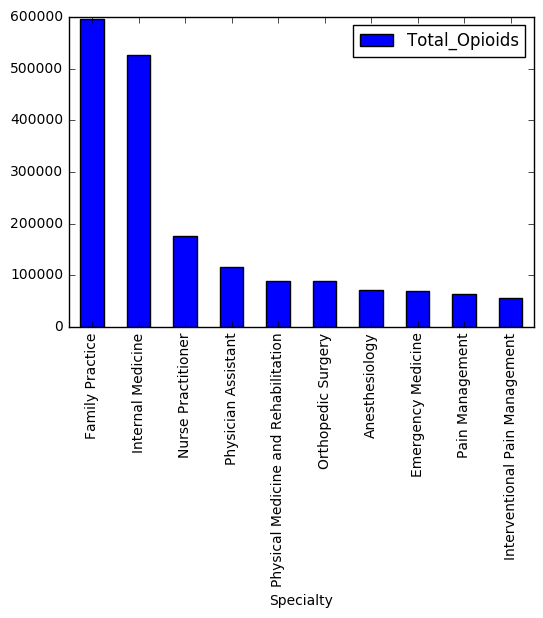

In [41]:
import matplotlib.pyplot as plt

OpioidsPerSpecialty = df[['Specialty','Total_Opioids']]
OpioidsPerSpecialty_group = OpioidsPerSpecialty.groupby('Specialty')
OpioidsPerSpecialty_totals = pd.DataFrame(OpioidsPerSpecialty_group.sum())

OpioidsPerSpecialty_totals=OpioidsPerSpecialty_totals.sort_values('Total_Opioids', ascending=False)
OpioidsPerSpecialty_totals.head(10).plot(kind='bar')

#Plotting a bar plot of total opioids prescribed vs the Speciality of the prescriber

In [42]:
Overdoses=pd.read_csv('overdoses.csv',index_col=0, parse_dates=True)

#Read the csv file that contains the overdose information

In [43]:
OverdosesPerState=Overdoses[['Deaths']]
OverdosesPerState.sort_values('Deaths', ascending=False)

type(OverdosesPerState.ix[2,'Deaths'])

#sort the dataframe based on the number of deaths per State

str

In [44]:
OverdosesPerState['Deaths']= OverdosesPerState['Deaths'].str.replace(',','')
OverdosesPerState['Deaths']= OverdosesPerState['Deaths'].astype(int)
OverdosesPerState=OverdosesPerState.sort_values('Deaths', ascending=False)
OverdosesPerState

#Removing the punctuation and converting the 'Deaths' column values from a string data type to integer

/home/deacuna/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/deacuna/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Deaths
State,
California,4521
Ohio,2744
Pennsylvania,2732
Florida,2634
Texas,2601
New York,2300
Michigan,1762
Illinois,1705
North Carolina,1358


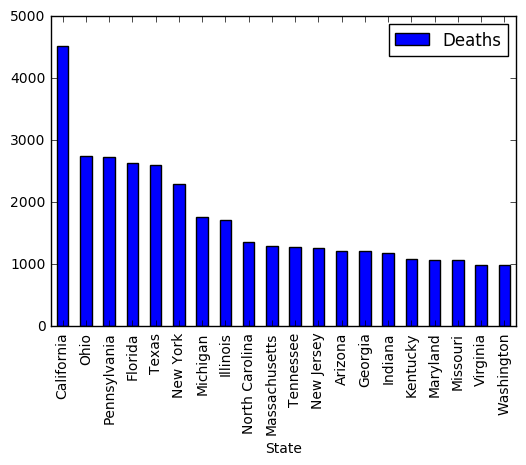

In [45]:
OverdosesPerState.head(20).plot(kind='bar')

#Plotting the number of deaths per State

In [46]:
Overdoses #Displaying the dataframe

,Population,Deaths,Abbrev
State,,,
Alabama,"4,833,722",723,AL
Alaska,"735,132",124,AK
Arizona,"6,626,624","1,211",AZ
Arkansas,"2,959,373",356,AR
California,"38,332,521","4,521",CA
Colorado,"5,268,367",899,CO
Connecticut,"3,596,080",623,CT
Delaware,"925,749",189,DE
Florida,"19,552,860","2,634",FL


In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[2]').getOrCreate()
from pyspark.ml import feature
from pyspark.ml import clustering
from pyspark.ml import classification
from pyspark.ml import regression
from pyspark.ml import Pipeline
from pyspark.sql import functions as fn
import numpy as np

#Including the pySpark packages

In [5]:
from pyspark.sql import Row
opioids=pd.read_csv('Newfile.csv',index_col=0, parse_dates=True,thousands=',' )

#Read the cleaned dataframe that has overdose information

In [1]:
%matplotlib inline
import pandas as pd
opioids=pd.read_csv('FINAL_Mil.csv',index_col=0, parse_dates=True,thousands=',' )
#opioids.Total_Deaths_Heroin_Mil = opioids.Total_Deaths_Heroin_Mil.astype(float)
#opioids.Total_Deaths_Opioids_Mil = opioids.Total_Deaths_Opioids_Mil.astype(float) 

#Read the cleaned dataframe that has prescriber info

In [138]:
opioids_df = spark.createDataFrame(opioids)

#Creating our original dataframe in Spark for further analysis

In [139]:
opioids_df

#displaying the dataframe

DataFrame[State: string, Population: bigint, Norm_Total_Opioid_Prescription_Mil: double, Norm_Opioid_Deaths_Mil: double, Norm_Heroin_Deaths_Mil: double, Death_per_Prescription_Mil: double, Prop_Morphine_all: double, Prop_MORPHINE2: double, Prop_METHADONE: double, Prop_OXYCODONE_all: double, Prop_OXYCODONE: double, Prop_HYDROMORPHONE: double, Prop_OXYCODONE2: double, Prop_HYDROCODONE: double, Prop_TRAMADOL: double, Prop_OXYCONTIN: double, Prop_ACETAMINOPHEN: double, Prop_CARISOPRODOL: double, Prop_FENTANYL: double, Prop_MORPHINE: double, Mil_Morphine_all: double, Mil_MORPHINE2: double, Mil_METHADONE: double, Mil_OXYCODONE_all: double, Mil_OXYCODONE: double, Mil_HYDROMORPHONE: double, Mil_OXYCODONE2: double, Mil_HYDROCODONE: double, Mil_TRAMADOL: double, Mil_OXYCONTIN: double, Mil_ACETAMINOPHEN: double, Mil_CARISOPRODOL: double, Mil_FENTANYL: double, Mil_MORPHINE: double, Family_Practice: double, Nurse_Practitioner: double, Physician_Assistant: double, Cardiology: double, Dentist: double

In [140]:
opioids_df.columns

#Viewing the columns in our dataframe

['State',
 'Population',
 'Norm_Total_Opioid_Prescription_Mil',
 'Norm_Opioid_Deaths_Mil',
 'Norm_Heroin_Deaths_Mil',
 'Death_per_Prescription_Mil',
 'Prop_Morphine_all',
 'Prop_MORPHINE2',
 'Prop_METHADONE',
 'Prop_OXYCODONE_all',
 'Prop_OXYCODONE',
 'Prop_HYDROMORPHONE',
 'Prop_OXYCODONE2',
 'Prop_HYDROCODONE',
 'Prop_TRAMADOL',
 'Prop_OXYCONTIN',
 'Prop_ACETAMINOPHEN',
 'Prop_CARISOPRODOL',
 'Prop_FENTANYL',
 'Prop_MORPHINE',
 'Mil_Morphine_all',
 'Mil_MORPHINE2',
 'Mil_METHADONE',
 'Mil_OXYCODONE_all',
 'Mil_OXYCODONE',
 'Mil_HYDROMORPHONE',
 'Mil_OXYCODONE2',
 'Mil_HYDROCODONE',
 'Mil_TRAMADOL',
 'Mil_OXYCONTIN',
 'Mil_ACETAMINOPHEN',
 'Mil_CARISOPRODOL',
 'Mil_FENTANYL',
 'Mil_MORPHINE',
 'Family_Practice',
 'Nurse_Practitioner',
 'Physician_Assistant',
 'Cardiology',
 'Dentist',
 'Dermatology',
 'Endocrinology',
 'Gastroenterology',
 'Geriatric_Medicine',
 'Internal_Medicine',
 'Nephrology',
 'Neurology',
 'Obstetrics_Gynecology',
 'Ophthalmology',
 'Otolaryngology',
 'Pediatric

In [141]:
opioids_df.printSchema()

#Displaying the schema of our dataframe

root
 |-- State: string (nullable = true)
 |-- Population: long (nullable = true)
 |-- Norm_Total_Opioid_Prescription_Mil: double (nullable = true)
 |-- Norm_Opioid_Deaths_Mil: double (nullable = true)
 |-- Norm_Heroin_Deaths_Mil: double (nullable = true)
 |-- Death_per_Prescription_Mil: double (nullable = true)
 |-- Prop_Morphine_all: double (nullable = true)
 |-- Prop_MORPHINE2: double (nullable = true)
 |-- Prop_METHADONE: double (nullable = true)
 |-- Prop_OXYCODONE_all: double (nullable = true)
 |-- Prop_OXYCODONE: double (nullable = true)
 |-- Prop_HYDROMORPHONE: double (nullable = true)
 |-- Prop_OXYCODONE2: double (nullable = true)
 |-- Prop_HYDROCODONE: double (nullable = true)
 |-- Prop_TRAMADOL: double (nullable = true)
 |-- Prop_OXYCONTIN: double (nullable = true)
 |-- Prop_ACETAMINOPHEN: double (nullable = true)
 |-- Prop_CARISOPRODOL: double (nullable = true)
 |-- Prop_FENTANYL: double (nullable = true)
 |-- Prop_MORPHINE: double (nullable = true)
 |-- Mil_Morphine_all: d

In [142]:
opioids_df.select(fn.corr('Norm_Total_Opioid_Prescription_Mil', 'Norm_Opioid_Deaths_Mil')).show()

#Finding the correlation between the number of opioids prescribed vs the number of deaths due to opioids

+----------------------------------------------------------------+
|corr(Norm_Total_Opioid_Prescription_Mil, Norm_Opioid_Deaths_Mil)|
+----------------------------------------------------------------+
|                                              0.1526029556309821|
+----------------------------------------------------------------+



In [143]:
opioids_df.select(fn.corr('Norm_Total_Opioid_Prescription_Mil', 'Norm_Heroin_Deaths_Mil')).show()

#Finding the correlation between the number of opioids prescribed vs the number of deaths due to heroin

+----------------------------------------------------------------+
|corr(Norm_Total_Opioid_Prescription_Mil, Norm_Heroin_Deaths_Mil)|
+----------------------------------------------------------------+
|                                               0.134357885436662|
+----------------------------------------------------------------+



In [144]:
opioids_df.select(fn.corr('Death_per_Prescription_Mil', 'Norm_Opioid_Deaths_Mil')).show()

#Finding the correlation between the number of deaths per prescription vs the number of deaths due to opioids

+--------------------------------------------------------+
|corr(Death_per_Prescription_Mil, Norm_Opioid_Deaths_Mil)|
+--------------------------------------------------------+
|                                     0.46444796553748174|
+--------------------------------------------------------+



In [145]:
opioids_df.select(fn.corr('Death_per_Prescription_Mil', 'Norm_Heroin_Deaths_Mil')).show()

#Finding the correlation between the number of deaths per prescription vs the number of deaths due to Heroin

+--------------------------------------------------------+
|corr(Death_per_Prescription_Mil, Norm_Heroin_Deaths_Mil)|
+--------------------------------------------------------+
|                                      0.4330581743821153|
+--------------------------------------------------------+



In [146]:
opioids_df.describe().toPandas()

#Displaying the opioids dataframe

,summary,Population,Norm_Total_Opioid_Prescription_Mil,Norm_Opioid_Deaths_Mil,Norm_Heroin_Deaths_Mil,Death_per_Prescription_Mil,Prop_Morphine_all,Prop_MORPHINE2,Prop_METHADONE,Prop_OXYCODONE_all,...,Cardiac_Electrophysiology,Hospice_and_Palliative_Care,Family_Medicine,Maxillofacial_Surgery,Interventional_Pain_Management,Naturopath,Pain_Management,Preventive_Medicine,Sports_Medicine,Gynecological_Oncology
0,count,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
1,mean,6309647.8,7164.823940000001,159.43568000000002,176.61764000000002,25922.86878,3.750461E-4,3.0205046799999997E-4,1.2112771359999998E-4,0.0014187486599999998,...,0.03333333334,0.00666666666,0.00666666666,0.02,0.02,0.01333333334,0.017142857140000002,0.00666666666,0.01,0.01
2,stddev,7061295.251857632,2543.481782366338,54.66843129580809,66.10836995874614,16145.431007011954,2.009810701918954E-4,1.6550258086011637E-4,8.602940149250366E-5,6.333831184952757E-4,...,0.13468700597228292,0.047140452031962723,0.047140452031962723,0.0989743318610787,0.0989743318610787,0.09428090420534678,0.12121830532606223,0.047140452031962723,0.07071067811865475,0.07071067811865475
3,min,582658,1767.03,59.4,67.4,8700.931,1.11254E-4,8.389420000000001E-5,8.54668E-6,1.19744E-4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,max,38332521,13281.677,338.13199999999995,390.98199999999997,95458.045,9.14342E-4,7.69774E-4,3.8600300000000005E-4,0.0026921040000000003,...,0.666666667,0.333333333,0.333333333,0.5,0.5,0.666666667,0.857142857,0.333333333,0.5,0.5


In [147]:
opioids_df.select('Norm_Heroin_Deaths_Mil').show(5)

# Viewing the Normalized Heroin deaths column of a dataframe

+----------------------+
|Norm_Heroin_Deaths_Mil|
+----------------------+
|               165.957|
|               152.264|
|                132.46|
|               192.255|
|               121.542|
+----------------------+
only showing top 5 rows



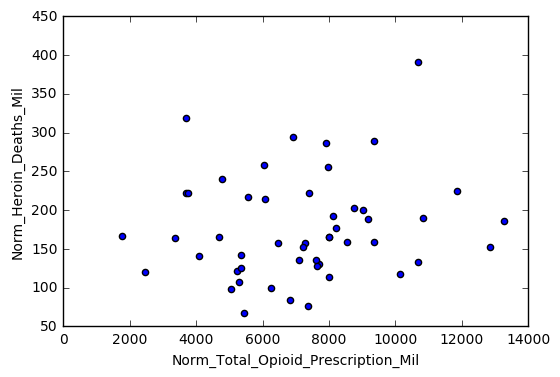

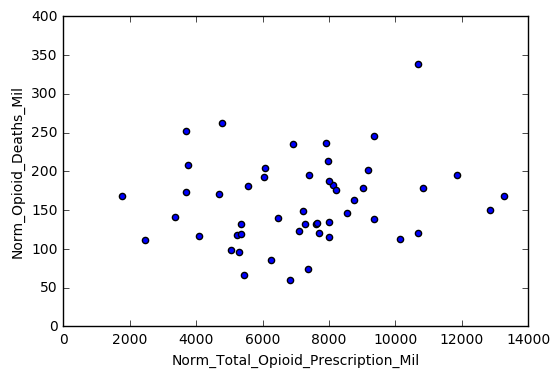

In [148]:
%matplotlib inline

opioids_df.select('Norm_Total_Opioid_Prescription_Mil', 'Norm_Heroin_Deaths_Mil').toPandas().plot(x='Norm_Total_Opioid_Prescription_Mil', y='Norm_Heroin_Deaths_Mil', kind='scatter')
opioids_df.select('Norm_Total_Opioid_Prescription_Mil', 'Norm_Opioid_Deaths_Mil').toPandas().plot(x='Norm_Total_Opioid_Prescription_Mil', y='Norm_Opioid_Deaths_Mil', kind='scatter')

#plotting a scatter plot of normalized toal opioid prescription vs Normalized Heroin deaths

#plotting a scatter plot of normalized toal opioid prescription vs Normalized opioid deaths

In [149]:
###### MODELS  Linear Regresssion Norm_Total_Opioid_Prescription to Predict Norm_Opioid_Deaths and HEROIN DEATHS

In [150]:
from pyspark import keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.ml.linalg import VectorUDT, Vectors

def to_dense(sparse_vector):
    return Vectors.dense(sparse_vector)

#defining a function to densify a sparse vector

to_dense_udf = fn.udf(to_dense, VectorUDT())

class Densify(Transformer, HasInputCol, HasOutputCol):
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(Densify, self).__init__()
        self._setDefault()
        kwargs = self.__init__._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self.setParams._input_kwargs
        return self._set(**kwargs)

    def _transform(self, dataset):
        out_col = self.getOutputCol()
        in_col = dataset[self.getInputCol()]
        return dataset.withColumn(out_col, to_dense_udf(in_col))
    
#Defining a function to transform the sparse dataframe column to a dense column

In [151]:
va = feature.VectorAssembler(inputCols=['Norm_Total_Opioid_Prescription_Mil'], outputCol='features')

# creating a vector assembler for normalised total opioid prescription

va1=feature.VectorAssembler(inputCols=['Norm_Total_Opioid_Prescription_Mil','Family_Practice','Nurse_Practitioner','Physician_Assistant','Cardiology','Dentist','Dermatology','Endocrinology','Gastroenterology','Geriatric_Medicine','Internal_Medicine','Nephrology','Neurology','Obstetrics_Gynecology','Ophthalmology','Otolaryngology','Pediatric_Medicine','Physical_Medicine_and_Rehabilitation','Psychiatry','Pulmonary_Disease','Specialist','Student_in_an_Organized_Health_Care_Education_Training_Program','Urology','Infectious_Disease','Anesthesiology','Colorectal_Surgery__formerly_proctology_','General_Practice','General_Surgery','Osteopathic_Manipulative_Medicine','Podiatry','Allergy_Immunology','Cardiac_Surgery','Critical_Care__Intensivists_','Diagnostic_Radiology','Emergency_Medicine','Hematology_Oncology','Hospitalist','Medical_Oncology','Neuropsychiatry','Nuclear_Medicine','Optometry','Oral_Surgery__dentists_only_','Orthopaedic_Surgery','Pharmacist','Plastic_Surgery','Psychiatry___Neurology','Radiation_Oncology','Registered_Nurse','Rheumatology','Thoracic_Surgery','Vascular_Surgery','Orthopedic_Surgery','Hematology','Neurosurgery','Pathology','Plastic_and_Reconstructive_Surgery','Certified_Clinical_Nurse_Specialist','Cardiac_Electrophysiology','Hospice_and_Palliative_Care','Family_Medicine','Maxillofacial_Surgery','Interventional_Pain_Management','Naturopath','Pain_Management','Preventive_Medicine','Sports_Medicine','Gynecological_Oncology'], outputCol='features')

## creating a vector assembler for normalised total opioid prescription and the Speciality of the prescribers

va2=feature.VectorAssembler(inputCols=['Norm_Total_Opioid_Prescription_Mil','Death_per_Prescription_Mil'], outputCol='features')

# creating a vector assembler for normalised total opioid prescription and deaths per prescription

va7=feature.VectorAssembler(inputCols=['Norm_Total_Opioid_Prescription_Mil','Mil_Morphine_all','Mil_MORPHINE2','Mil_METHADONE','Mil_OXYCODONE_all','Mil_OXYCODONE','Mil_HYDROMORPHONE','Mil_OXYCODONE2','Mil_HYDROCODONE','Mil_TRAMADOL','Mil_OXYCONTIN','Mil_ACETAMINOPHEN','Mil_CARISOPRODOL','Mil_FENTANYL','Mil_MORPHINE','Family_Practice','Nurse_Practitioner','Physician_Assistant','Cardiology','Dentist','Dermatology','Endocrinology','Gastroenterology','Geriatric_Medicine','Internal_Medicine','Nephrology','Neurology','Obstetrics_Gynecology','Ophthalmology','Otolaryngology','Pediatric_Medicine','Physical_Medicine_and_Rehabilitation','Psychiatry','Pulmonary_Disease','Specialist','Student_in_an_Organized_Health_Care_Education_Training_Program','Urology','Infectious_Disease','Anesthesiology','Colorectal_Surgery__formerly_proctology_','General_Practice','General_Surgery','Osteopathic_Manipulative_Medicine','Podiatry','Allergy_Immunology','Cardiac_Surgery','Critical_Care__Intensivists_','Diagnostic_Radiology','Emergency_Medicine','Hematology_Oncology','Hospitalist','Medical_Oncology','Neuropsychiatry','Nuclear_Medicine','Optometry','Oral_Surgery__dentists_only_','Orthopaedic_Surgery','Pharmacist','Plastic_Surgery','Psychiatry___Neurology','Radiation_Oncology','Registered_Nurse','Rheumatology','Thoracic_Surgery','Vascular_Surgery','Orthopedic_Surgery','Hematology','Neurosurgery','Pathology','Plastic_and_Reconstructive_Surgery','Certified_Clinical_Nurse_Specialist','Cardiac_Electrophysiology','Hospice_and_Palliative_Care','Family_Medicine','Maxillofacial_Surgery','Interventional_Pain_Management','Naturopath','Pain_Management','Preventive_Medicine','Sports_Medicine','Gynecological_Oncology'], outputCol='features')

# creating a vector assembler for normalised total opioid prescription, number of precriptions for every opioid drug, and precriber's speciality

va8=feature.VectorAssembler(inputCols=['Norm_Total_Opioid_Prescription_Mil','Mil_Morphine_all','Mil_MORPHINE2','Mil_METHADONE','Mil_OXYCODONE_all','Mil_OXYCODONE','Mil_HYDROMORPHONE','Mil_OXYCODONE2','Mil_HYDROCODONE','Mil_TRAMADOL','Mil_OXYCONTIN','Mil_ACETAMINOPHEN','Mil_CARISOPRODOL','Mil_FENTANYL','Mil_MORPHINE'], outputCol='features')

# creating a vector assembler for normalised total opioid prescription and number of precriptions for every opioid drug

#'Prop_Morphine_all','Prop_MORPHINE2','Prop_METHADONE','Prop_OXYCODONE_all','Prop_OXYCODONE','Prop_HYDROMORPHONE','Prop_OXYCODONE2','Prop_HYDROCODONE','Prop_TRAMADOL','Prop_OXYCONTIN','Prop_ACETAMINOPHEN','Prop_CARISOPRODOL','Prop_FENTANYL','Prop_MORPHINE',


lr = regression.LinearRegression(featuresCol='features', 
                                  labelCol='Norm_Opioid_Deaths_Mil',
                                  regParam=0.1, 
                                  elasticNetParam=0.3)

# define linear regression with respective features and elastic net regularization parameter

def mse(col):
    return (fn.avg((fn.col(col) - fn.col('prediction'))**2)).alias('mse')
def rmse(col):
    return (fn.sqrt(fn.avg((fn.col(col) - fn.col('prediction'))**2))).alias('rmse')

#define functions to calculate the mse and rmse

In [1]:
#farees
poly = feature.PolynomialExpansion(degree=2, inputCol= 'features' , outputCol='poly_features')

va_2 = feature.VectorAssembler(inputCols=['features', 'poly_features'], outputCol='all_features')

lr_all_1 = regression.LinearRegression(featuresCol='all_features', labelCol='Norm_Opioid_Deaths_Mil', regParam=1.)
lr_all_2 = regression.LinearRegression(featuresCol='all_features', labelCol='Norm_Opioid_Deaths_Mil', regParam=1, elasticNetParam=0.3)

#define  a polynomial linear regression

In [238]:
training, validation, testing= opioids_df.randomSplit([0.7,0.2, 0.1], seed=0)

# dividing the dataset into training, validation and testing

In [239]:
pipeline1 = Pipeline(stages=[va, lr])
pipeline2 = Pipeline(stages=[va1, lr])
pipeline3 = Pipeline(stages=[va2, lr])
pipeline7 = Pipeline(stages=[va7, lr])
pipeline8 = Pipeline(stages=[va8, lr])


pipeline9 = Pipeline(stages=[va_2,lr_all_1])
pipeline10 = Pipeline(stages=[va_2,lr_all_2])

#creating pipelines for every vector assembler defined in the previous cells

In [240]:
model1 = pipeline1.fit(opioids_df)
model2 = pipeline2.fit(opioids_df)
model3 = pipeline3.fit(opioids_df)
model7 = pipeline7.fit(opioids_df)
model8 = pipeline8.fit(opioids_df)


model9 = pipeline9.fit(opioids_df)
model10 = pipeline10.fit(opioids_df)

#fit the model to our opioids dataframe

In [241]:
lr_model1 = model1.stages[1]
lr_model2 = model2.stages[1]
lr_model3 = model3.stages[1]
lr_model7 = model7.stages[1]
lr_model8 = model8.stages[1]


lr_model9 = model9.stages[1]
lr_model10 = model10.stages[1]

# trying to evaluate the values for every parameter defined in the vector assembler

In [242]:
model1 = pipeline1.fit(training)
model2 = pipeline2.fit(training)
model3 = pipeline3.fit(training)
model7 = pipeline7.fit(training)
model8 = pipeline8.fit(training)

#farees
model9 = pipeline9.fit(training)
model10 = pipeline10.fit(training)

#fit the model to our training opioids dataframe

In [243]:
model1.transform(validation).select(rmse('Norm_Opioid_Deaths_Mil')).show()
model2.transform(validation).select(rmse('Norm_Opioid_Deaths_Mil')).show()
model3.transform(validation).select(rmse('Norm_Opioid_Deaths_Mil')).show()
model7.transform(validation).select(rmse('Norm_Opioid_Deaths_Mil')).show()
model8.transform(validation).select(rmse('Norm_Opioid_Deaths_Mil')).show()


model9.transform(validation).select(rmse('Norm_Opioid_Deaths_Mil')).show()
model10.transform(validation).select(rmse('Norm_Opioid_Deaths_Mil')).show()


model1.transform(validation).select(mse('Norm_Opioid_Deaths_Mil')).show()
model2.transform(validation).select(mse('Norm_Opioid_Deaths_Mil')).show()
model3.transform(validation).select(mse('Norm_Opioid_Deaths_Mil')).show()
model7.transform(validation).select(mse('Norm_Opioid_Deaths_Mil')).show()
model8.transform(validation).select(mse('Norm_Opioid_Deaths_Mil')).show()


model9.transform(validation).select(mse('Norm_Opioid_Deaths_Mil')).show()
model10.transform(validation).select(mse('Norm_Opioid_Deaths_Mil')).show()

#validating our model by estimating the mse and rmse using our validation dataset

+-----------------+
|             rmse|
+-----------------+
|45.05872539839272|
+-----------------+

+------------------+
|              rmse|
+------------------+
|116.90353007659684|
+------------------+

+----------------+
|            rmse|
+----------------+
|87.2695394184736|
+----------------+

+-----------------+
|             rmse|
+-----------------+
|66.71876956919814|
+-----------------+

+-----------------+
|             rmse|
+-----------------+
|52.35543501334393|
+-----------------+

+------------------+
|               mse|
+------------------+
|2030.2887345277607|
+------------------+

+------------------+
|               mse|
+------------------+
|13666.435344369782|
+------------------+

+-----------------+
|              mse|
+-----------------+
|7615.972510312518|
+-----------------+

+----------------+
|             mse|
+----------------+
|4451.39421282776|
+----------------+

+------------------+
|               mse|
+------------------+
|2741.0915754364796|
+-

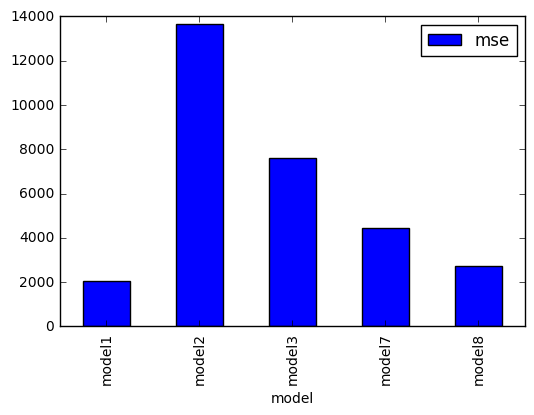

In [244]:
model1.transform(validation).select(fn.lit('model1').alias('model'), mse('Norm_Opioid_Deaths_Mil')).union(
    model2.transform(validation).select(fn.lit('model2').alias('model'), mse('Norm_Opioid_Deaths_Mil')).union(
        model3.transform(validation).select(fn.lit('model3').alias('model'), mse('Norm_Opioid_Deaths_Mil')).union(
        model7.transform(validation).select(fn.lit('model7').alias('model'), mse('Norm_Opioid_Deaths_Mil')).union(
        model8.transform(validation).select(fn.lit('model8').alias('model'), mse('Norm_Opioid_Deaths_Mil'))
    )
))).toPandas().plot(x='model', y = 'mse', kind='bar')

#Plotting a bar plot of mse to interpret the best model on validation dataset

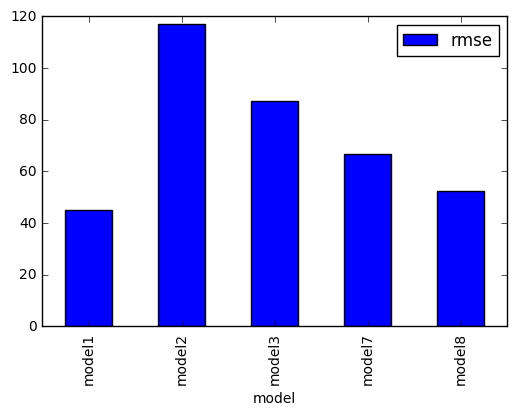

In [245]:
model1.transform(validation).select(fn.lit('model1').alias('model'), rmse('Norm_Opioid_Deaths_Mil')).union(
    model2.transform(validation).select(fn.lit('model2').alias('model'), rmse('Norm_Opioid_Deaths_Mil')).union(
        model3.transform(validation).select(fn.lit('model3').alias('model'), rmse('Norm_Opioid_Deaths_Mil')).union(
        model7.transform(validation).select(fn.lit('model7').alias('model'), rmse('Norm_Opioid_Deaths_Mil')).union(
        model8.transform(validation).select(fn.lit('model8').alias('model'), rmse('Norm_Opioid_Deaths_Mil'))
    )
))).toPandas().plot(x='model', y = 'rmse', kind='bar');

#Plotting a bar plot of rmse to interpret the best model on validation dataset

In [257]:
### Opoiod Death Prediciton Model GENERALIZABILITY
model1.transform(testing).select(mse('Norm_Opioid_Deaths_Mil')).show()

#estimating the model generalization error

+-----------------+
|              mse|
+-----------------+
|4194.650445965208|
+-----------------+



In [247]:
pd.DataFrame([va1.getInputCols(),model2.stages[-1].coefficients.toArray().tolist()]).T.rename(columns={0:"feature", 1: "weight"}).sort_values('weight', ascending=False)

#extracting the weight for prescriber's specialty

,feature,weight
45,Psychiatry___Neurology,271.098
10,Internal_Medicine,132.778
57,Cardiac_Electrophysiology,120.235
19,Pulmonary_Disease,110.407
14,Ophthalmology,108.026
2,Nurse_Practitioner,106.388
59,Family_Medicine,102.274
11,Nephrology,88.5384
47,Registered_Nurse,68.1829
21,Student_in_an_Organized_Health_Care_Education_...,65.1943


In [248]:
pd.DataFrame([va8.getInputCols(),model8.stages[-1].coefficients.toArray().tolist()]).T.rename(columns={0:"feature", 1: "weight"}).sort_values('weight', ascending=False)

#extracting the weight for the opioids drugs

,feature,weight
11,Mil_ACETAMINOPHEN,0.197992
5,Mil_OXYCODONE,0.0639868
3,Mil_METHADONE,0.0631116
4,Mil_OXYCODONE_all,0.0304084
8,Mil_HYDROCODONE,0.010534
7,Mil_OXYCODONE2,0.00933388
0,Norm_Total_Opioid_Prescription_Mil,0.00321375
2,Mil_MORPHINE2,-0.0257552
1,Mil_Morphine_all,-0.0276296
9,Mil_TRAMADOL,-0.0291991


In [249]:
va3 = feature.VectorAssembler(inputCols=['Norm_Total_Opioid_Prescription_Mil','Norm_Opioid_Deaths_Mil'], outputCol='features')

# creating a vector assembler for normalised total opioid prescription and deaths

va4=feature.VectorAssembler(inputCols=['Norm_Total_Opioid_Prescription_Mil','Norm_Opioid_Deaths_Mil','Family_Practice','Nurse_Practitioner','Physician_Assistant','Cardiology','Dentist','Dermatology','Endocrinology','Gastroenterology','Geriatric_Medicine','Internal_Medicine','Nephrology','Neurology','Obstetrics_Gynecology','Ophthalmology','Otolaryngology','Pediatric_Medicine','Physical_Medicine_and_Rehabilitation','Psychiatry','Pulmonary_Disease','Specialist','Student_in_an_Organized_Health_Care_Education_Training_Program','Urology','Infectious_Disease','Anesthesiology','Colorectal_Surgery__formerly_proctology_','General_Practice','General_Surgery','Osteopathic_Manipulative_Medicine','Podiatry','Allergy_Immunology','Cardiac_Surgery','Critical_Care__Intensivists_','Diagnostic_Radiology','Emergency_Medicine','Hematology_Oncology','Hospitalist','Medical_Oncology','Neuropsychiatry','Nuclear_Medicine','Optometry','Oral_Surgery__dentists_only_','Orthopaedic_Surgery','Pharmacist','Plastic_Surgery','Psychiatry___Neurology','Radiation_Oncology','Registered_Nurse','Rheumatology','Thoracic_Surgery','Vascular_Surgery','Orthopedic_Surgery','Hematology','Neurosurgery','Pathology','Plastic_and_Reconstructive_Surgery','Certified_Clinical_Nurse_Specialist','Cardiac_Electrophysiology','Hospice_and_Palliative_Care','Family_Medicine','Maxillofacial_Surgery','Interventional_Pain_Management','Naturopath','Pain_Management','Preventive_Medicine','Sports_Medicine','Gynecological_Oncology'], outputCol='features')

## creating a vector assembler for normalised total opioid prescription and the Speciality of the prescribers

va5=feature.VectorAssembler(inputCols=['Norm_Total_Opioid_Prescription_Mil','Death_per_Prescription_Mil'], outputCol='features')

# creating a vector assembler for normalised total opioid prescription and deaths per prescription

va9=feature.VectorAssembler(inputCols=['Norm_Total_Opioid_Prescription_Mil','Norm_Opioid_Deaths_Mil','Mil_MORPHINE2','Mil_OXYCODONE','Mil_MORPHINE','Mil_OXYCODONE2','Mil_Morphine_all','Mil_METHADONE','Mil_OXYCODONE_all','Mil_HYDROMORPHONE','Mil_HYDROCODONE','Mil_TRAMADOL','Mil_OXYCONTIN','Mil_ACETAMINOPHEN','Mil_CARISOPRODOL','Mil_FENTANYL','Family_Practice','Nurse_Practitioner','Physician_Assistant','Cardiology','Dentist','Dermatology','Endocrinology','Gastroenterology','Geriatric_Medicine','Internal_Medicine','Nephrology','Neurology','Obstetrics_Gynecology','Ophthalmology','Otolaryngology','Pediatric_Medicine','Physical_Medicine_and_Rehabilitation','Psychiatry','Pulmonary_Disease','Specialist','Student_in_an_Organized_Health_Care_Education_Training_Program','Urology','Infectious_Disease','Anesthesiology','Colorectal_Surgery__formerly_proctology_','General_Practice','General_Surgery','Osteopathic_Manipulative_Medicine','Podiatry','Allergy_Immunology','Cardiac_Surgery','Critical_Care__Intensivists_','Diagnostic_Radiology','Emergency_Medicine','Hematology_Oncology','Hospitalist','Medical_Oncology','Neuropsychiatry','Nuclear_Medicine','Optometry','Oral_Surgery__dentists_only_','Orthopaedic_Surgery','Pharmacist','Plastic_Surgery','Psychiatry___Neurology','Radiation_Oncology','Registered_Nurse','Rheumatology','Thoracic_Surgery','Vascular_Surgery','Orthopedic_Surgery','Hematology','Neurosurgery','Pathology','Plastic_and_Reconstructive_Surgery','Certified_Clinical_Nurse_Specialist','Cardiac_Electrophysiology','Hospice_and_Palliative_Care','Family_Medicine','Maxillofacial_Surgery','Interventional_Pain_Management','Naturopath','Pain_Management','Preventive_Medicine','Sports_Medicine','Gynecological_Oncology'], outputCol='features')

# creating a vector assembler for normalised total opioid prescription, number of precriptions for every opioid drug, and precriber's speciality

va10=feature.VectorAssembler(inputCols=['Norm_Total_Opioid_Prescription_Mil','Norm_Opioid_Deaths_Mil','Mil_MORPHINE2','Mil_OXYCODONE','Mil_MORPHINE','Mil_OXYCODONE2','Mil_Morphine_all','Mil_METHADONE','Mil_OXYCODONE_all','Mil_HYDROMORPHONE','Mil_HYDROCODONE','Mil_TRAMADOL','Mil_OXYCONTIN','Mil_ACETAMINOPHEN','Mil_CARISOPRODOL','Mil_FENTANYL'], outputCol='features')

# creating a vector assembler for normalised total opioid prescription and number of precriptions for every opioid drug

lr1 = regression.LinearRegression(featuresCol='features', 
                                  labelCol='Norm_Heroin_Deaths_Mil',
                                  regParam=0.1, 
                                  elasticNetParam=0.3)

# define linear regression with respective features and elastic net regularization parameter

In [ ]:

poly = feature.PolynomialExpansion(degree=2, inputCol= 'features' , outputCol='poly_features')

va_2 = feature.VectorAssembler(inputCols=['features', 'poly_features'], outputCol='all_features')

lr_all_1 = regression.LinearRegression(featuresCol='all_features', labelCol='Norm_Heroin_Deaths_Mil', regParam=1.)
lr_all_2 = regression.LinearRegression(featuresCol='all_features', labelCol='Norm_Heroin_Deaths_Mil', regParam=1, elasticNetParam=0.3)

#creating a polynomial linear regression

In [250]:
pipeline4 = Pipeline(stages=[va3, lr1])
pipeline5 = Pipeline(stages=[va4, lr1])
pipeline6 = Pipeline(stages=[va5, lr1])
pipeline9 = Pipeline(stages=[va9, lr1])
pipeline10 = Pipeline(stages=[va10, lr1])
#pipeline11 = Pipeline(stages=[va11, lr1])


pipeline11 = Pipeline(stages=[va_2,lr_all_1])
pipeline12 = Pipeline(stages=[va_2,lr_all_2])

#creating pipelines for every vector assembler defined in the previous cells

In [251]:
model4 = pipeline4.fit(opioids_df)
model5 = pipeline5.fit(opioids_df)
model6 = pipeline6.fit(opioids_df)
model9 = pipeline9.fit(opioids_df)
model10 = pipeline10.fit(opioids_df)
#model11 = pipeline11.fit(opioids_df)


model11 = pipeline11.fit(opioids_df)
model12 = pipeline12.fit(opioids_df)

#fit the model to our opioids dataframe

In [252]:
lr_model4 = model4.stages[1]
lr_model5 = model5.stages[1]
lr_model6 = model6.stages[1]
lr_model9 = model9.stages[1]
lr_model10 = model10.stages[1]
#lr_model11 = model11.stages[1]


lr_model11 = model11.stages[1]
lr_model12 = model12.stages[1]

## trying to evaluate the values for every parameter defined in the vector assembler

In [253]:
model4 = pipeline4.fit(training)
model5 = pipeline5.fit(training)
model6 = pipeline6.fit(training)
model9 = pipeline9.fit(training)
model10 = pipeline10.fit(training)
#model11 = pipeline11.fit(training)

#farees
model1 = pipeline11.fit(training)
model12 = pipeline12.fit(training)

#fit the model to our training opioids dataframe

In [254]:
model4.transform(validation).select(rmse('Norm_Heroin_Deaths_Mil')).show()
model5.transform(validation).select(rmse('Norm_Heroin_Deaths_Mil')).show()
model6.transform(validation).select(rmse('Norm_Heroin_Deaths_Mil')).show()
model9.transform(validation).select(rmse('Norm_Heroin_Deaths_Mil')).show()
model10.transform(validation).select(rmse('Norm_Heroin_Deaths_Mil')).show()
#model11.transform(validation).select(rmse('Norm_Heroin_Deaths_Mil')).show()


model11.transform(validation).select(rmse('Norm_Heroin_Deaths_Mil')).show()
model12.transform(validation).select(rmse('Norm_Heroin_Deaths_Mil')).show()

model4.transform(validation).select(mse('Norm_Heroin_Deaths_Mil')).show()
model5.transform(validation).select(mse('Norm_Heroin_Deaths_Mil')).show()
model6.transform(validation).select(mse('Norm_Heroin_Deaths_Mil')).show()
model9.transform(validation).select(mse('Norm_Heroin_Deaths_Mil')).show()
model10.transform(validation).select(mse('Norm_Heroin_Deaths_Mil')).show()
#model11.transform(validation).select(mse('Norm_Heroin_Deaths_Mil')).show()


model11.transform(validation).select(mse('Norm_Heroin_Deaths_Mil')).show()
model12.transform(validation).select(mse('Norm_Heroin_Deaths_Mil')).show()

#validating our model by estimating the mse and rmse using our validation dataset

+-----------------+
|             rmse|
+-----------------+
|26.17999028066231|
+-----------------+

+------------------+
|              rmse|
+------------------+
|37.639846299544104|
+------------------+

+------------------+
|              rmse|
+------------------+
|108.91475100786916|
+------------------+

+----------------+
|            rmse|
+----------------+
|35.6707313705571|
+----------------+

+------------------+
|              rmse|
+------------------+
|20.809189597743273|
+------------------+

+----------------+
|             mse|
+----------------+
|685.391891095573|
+----------------+

+-----------------+
|              mse|
+-----------------+
|1416.758029453304|
+-----------------+

+------------------+
|               mse|
+------------------+
|11862.422987106136|
+------------------+

+------------------+
|               mse|
+------------------+
|1272.4010765104463|
+------------------+

+-----------------+
|              mse|
+-----------------+
|433.02237171482

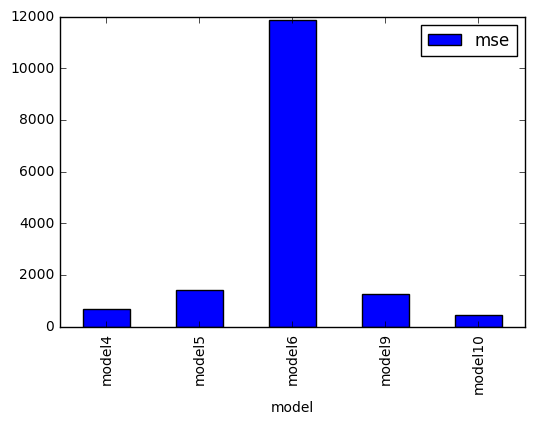

In [255]:
model4.transform(validation).select(fn.lit('model4').alias('model'), mse('Norm_Heroin_Deaths_Mil')).union(
    model5.transform(validation).select(fn.lit('model5').alias('model'), mse('Norm_Heroin_Deaths_Mil')).union(
        model6.transform(validation).select(fn.lit('model6').alias('model'), mse('Norm_Heroin_Deaths_Mil')).union(
            model9.transform(validation).select(fn.lit('model9').alias('model'), mse('Norm_Heroin_Deaths_Mil')).union(
            model10.transform(validation).select(fn.lit('model10').alias('model'), mse('Norm_Heroin_Deaths_Mil'))
    )
))).toPandas().plot(x='model', y = 'mse', kind='bar');

#Plotting a bar plot of mse to interpret the best model on validation dataset

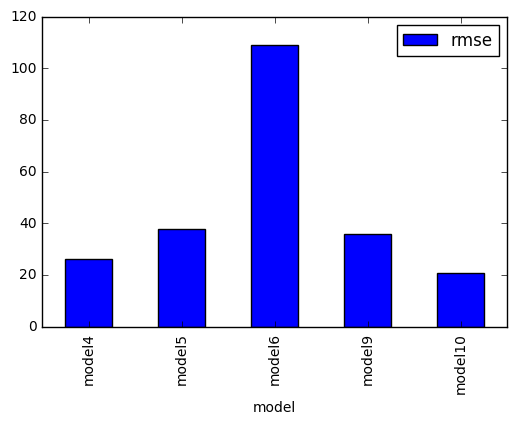

In [261]:

model4.transform(validation).select(fn.lit('model4').alias('model'), rmse('Norm_Heroin_Deaths_Mil')).union(
    model5.transform(validation).select(fn.lit('model5').alias('model'), rmse('Norm_Heroin_Deaths_Mil')).union(
        model6.transform(validation).select(fn.lit('model6').alias('model'), rmse('Norm_Heroin_Deaths_Mil')).union(
            model9.transform(validation).select(fn.lit('model9').alias('model'), rmse('Norm_Heroin_Deaths_Mil')).union(
            model10.transform(validation).select(fn.lit('model10').alias('model'), rmse('Norm_Heroin_Deaths_Mil'))
    )
))).toPandas().plot(x='model', y = 'rmse', kind='bar')

#Plotting a bar plot of rmse to interpret the best model on validation dataset

In [262]:
### Heroin Death Prediciton Model GENERALIZABILITY
model10.transform(testing).select(mse('Norm_Opioid_Deaths_Mil')).show()

#estimating the generalization error of the best model 

+-----------------+
|              mse|
+-----------------+
|560.5327842582121|
+-----------------+

